# Portada

INSTITUTO TECNOLOGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY

 CAMPUS PUEBLA

ANALITICA DE DATOS Y HERRAMIENTAS DE INTELIGENCIA ARTIFICIAL II

ACTIVIDAD INTEGRADORA - CLASIFICACIÓN

ALUMNO:

Ángel Roberto González Angulo | A01735880

PROFESOR:

Candy Yuridiana Alemán Muñoz

GRUPO:
501


FECHA DE ENTREGA:
21 - 10 - 2024

# Lectura de datos

In [1]:
# Lectura de librerías a usar

import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [2]:
# Lectura de archivo
df =pd.read_csv('diabetesAct.csv')
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,3,158,76,36,245,31.6,0.851,28,tested_positive
1,1,117,60,23,106,33.8,0.466,27,tested_negative
2,1,107,50,19,0,28.3,0.181,29,tested_negative
3,1,90,62,12,43,27.2,0.580,24,tested_negative
4,2,88,58,26,16,28.4,0.766,22,tested_negative
...,...,...,...,...,...,...,...,...,...
763,3,102,74,0,0,29.5,0.121,32,tested_negative
764,2,100,70,52,57,40.5,0.677,25,tested_negative
765,5,130,82,0,0,39.1,0.956,37,tested_positive
766,13,104,72,0,0,31.2,0.465,38,tested_positive


In [3]:
# Vemos la distribución de las clases objetivo
df['class'].value_counts()

class
tested_negative    500
tested_positive    268
Name: count, dtype: int64

In [4]:
# Renombrar una columna "plas" a "gluc"

df.rename(columns={"plas":"gluc"}, inplace= True)

In [5]:
# Vamos a cambiar nuestra variable objetivo a numérica 0 y 1

df['class'] = df['class'].str.replace('tested_positive', '1')
df['class'] = df['class'].str.replace('tested_negative', '0')
df['class'] = pd.to_numeric(df['class'], errors='coerce')
df['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

In [6]:
# Comprobamos los valores del df, todos son de tipo numérico
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   gluc    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Verificar valores nulos
print("Valores nulos en el DataFrame:")
df.isnull().sum().sum()

Valores nulos en el DataFrame:


np.int64(0)

Significados de las variables:

For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

   Todos los pacientes son mujeres y no hay valores nulos

# Descripción de datos

## Análisis Estadístico descriptivo

### En conjunto:

In [8]:
# Para analizar la base empecemos con algunos datos descriptivos

df["preg"].describe()
df["gluc"].describe()
df["pres"].describe()
df["insu"].describe()
df["mass"].describe()
df["pedi"].describe()
df["age"].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

Times pregnant variable: En este análisis exploratorio se nos menciona que, en general, las pacientes que recurrieron a hacer este test de diabetes han estado embarazadas unas 4 veces aproximadamente. Teniendo una desviación estándar de 3.37 nos indica que hay una variabilidad moderada en el número de embarazos entre las pacientes ya que tenemos aquellas que no han estado embarazadas mientras que hay un caso donde ha habido 17 embarazos lo cual puede ser considerado como valor atípico alterando los cuartiles y promedios.

Glucosa: Para esta variable, se pueden encontrar errores de cáptura ya que algunas personas reportan 0 en el test de glucosa y, dado el tipo de estudio y la muestra de los pacientes esto no puede ser posible, el promedio de esta muestra fue de un nivel de 121. En este test, la interpretación corresponde de menor de 140 mg/dL es catalogado como normal, de 140 a 199 corresponde a cierta tolerancia de glucosa y finalmente de 200 o más se tiene diabetes. En este test, no parece haber indicios explicitos de diabetes, sin embargo, deben hacerse más estudios y tomar en cuenta otros apartados para determinar esta enfermedad

Presión sanguínea: Al hacer esta primer investigación debemos tener errores de cáptura ya que hay valores de 0 en la presión sanguínea lo cual no es posible debido al estudio y los pacientes, los valores pueden verse alterados debido a este valor mínimo, la presión sanguínea máxima fue de 122, se necesitaría consultar con un experto médico para análizar de manera correcta los datos en espécifico aquellos que resultan muy elevados a la media.

Insulina Sérica: Lo mismo ocurre para la insulina sérica en la cual tenemos registros de 0 los cuales son errores de cáptura o valores faltantes ya que debido al contexto, puede considerarse un error modificando así las métricas como el promedio y la desviación estandar, el valor máximo fue de 846 lo cual es un caso anómalo y que también afecta las métricas.

IMC: Para el índice de masa corporal, el promedio de esta muestra es de 31.99 IMC así como la mediana que es de 32 lo cual índicaría que la mayoría de los pacientes tienen un IMC alto cayendo en sobrepeso, el valor máximo de 67 podría ser error de cáptura.

Diabetes Pedigree Function: Esta métrica establece la herencia por diabetes partiendo de una escala de 0.08 a 2.42 donde los valores máximos indicarían una fuerte relación de herencia con la enfermedad, en este caso se cuentan con estos valores extremos así como una mediana de 0.37 que índicaría que la mitad de los pacientes cuentan con antecedententes de familiares con diabetes.

Años de los pacientes: En esta métrica tenemos como valor mínimo a una paciente de 21 años y también en el otro extremo como valor máximo a una paciente de 81 años, la media de edad en este estudio es de personas con 33 años estando en la categoría de adulto, a partir del tercer cuartil las personas tienen 41 años o más. 

Se necesitaría hacer una limpieza de datos previas para hacer un análisis mejor definido o tener un experto que nos apoye a encontrar insights más relevantes en este contexto con datos médicos para poder hacer una exploración clínica más compleja.

Para nuestra variable objetivo obtuvimos una base de datos desbalanceada donde la clase 0 (aquellas personas que no tienen diabetes) pertenecen a 500 registros dentro de nuestra base, mientras que aquellos que sí padecen la enfermedad representan el 34% del total.

In [9]:
# Ver valores atípicos
df["pres"][df["pres"] == 0].count() # Hay 35 datos
df["insu"][df["insu"] == 0].count() # Hay 374 datos (Debido a la cantidad total de datos, no se van a eliminar)
# Ajusto el filtro para que tome en cuenta ambos valores (Presión e insulina), ambas clases parecen estar balanceadas
df["class"][(df["pres"] == 0) & (df["insu"] == 0)].value_counts()

class
0    19
1    16
Name: count, dtype: int64

In [10]:
# Las instancias a reemplazar son 35 contando con el filtro en ambas columnas

# Sacar mediana de las columnas de presión y insulina sin tomar en cuenta el 0 que afecta el análisis previo
presionMedian = df["pres"][df["pres"] != 0].median()
insuMedian = df["insu"][df["insu"] != 0].median()

# Hacemos el filtro realizado anteriormente y la colocamos dentro de una variable
filtroReplace = (df["pres"] == 0) & (df["insu"] == 0)

# Reemplazar solo en las filas donde hay esta coincidencia
df.loc[filtroReplace, "pres"] = presionMedian
df.loc[filtroReplace, "insu"] = insuMedian

In [11]:
# Comprobamos el cambio realizado
df[(df["pres"] == 0) & (df["insu"] == 0)]

,preg,gluc,pres,skin,insu,mass,pedi,age,class


In [12]:
# Ver valores atípicos de la columna glucosa:

df["gluc"][df["gluc"] == 0].count() # Hay 5 datos
df["class"][df["gluc"] == 0].value_counts() # Las clases se encuentran balanceadas, por lo que se puede hacer reemplazo de estos valores
glucoMedian = df["gluc"][df["gluc"] != 0].median() # Sacar la mediana de los valores donde la glucosa no es 0
filtroReplace2 = df["gluc"] == 0
df.loc[filtroReplace2, "gluc"] = glucoMedian

In [13]:
# Comprobamos el cambio realizado
df[df["gluc"] == 0]

,preg,gluc,pres,skin,insu,mass,pedi,age,class


### Por separado (Gráficas):

In [14]:
# Separamos el dataframe original por clase
df0 = df[df["class"] == 0]
df1 = df[df["class"] == 1]

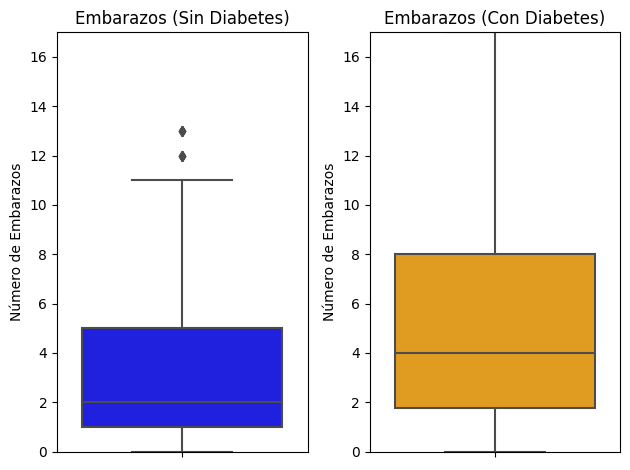

Embarazos (Sin diabetes):
count    500.000000
mean       3.298000
std        3.017185
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       13.000000
Name: preg, dtype: float64
Embarazos (Con diabetes):
count    268.000000
mean       4.865672
std        3.741239
min        0.000000
25%        1.750000
50%        4.000000
75%        8.000000
max       17.000000
Name: preg, dtype: float64


In [15]:
# Boxplot para 'preg' en el dataframe df0 (sin diabetes)
plt.subplot(1, 2, 1)
sns.boxplot(y=df0["preg"], color="blue")
plt.title('Embarazos (Sin Diabetes)')
plt.ylabel('Número de Embarazos')
plt.ylim(0, df["preg"].max())  # Igualar escala en el eje y

# Boxplot para 'preg' en el dataframe df1 (con diabetes)
plt.subplot(1, 2, 2)
sns.boxplot(y=df1["preg"], color="orange")
plt.title('Embarazos (Con Diabetes)')
plt.ylabel('Número de Embarazos')
plt.ylim(0, df["preg"].max())  # Igualar escala en el eje y

# Ajustar el espaciado entre las gráficas
plt.tight_layout()
plt.show()

print(f"Embarazos (Sin diabetes):\n{df0["preg"].describe()}")
print(f"Embarazos (Con diabetes):\n{df1["preg"].describe()}")

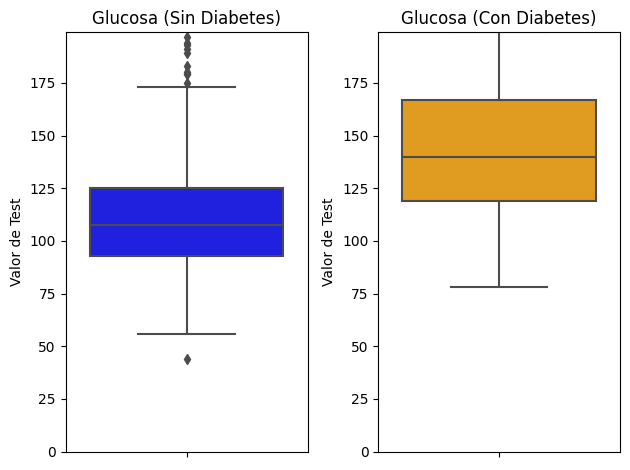

Glucosa (Sin diabetes):
count    500.000000
mean     110.682000
std       24.707201
min       44.000000
25%       93.000000
50%      107.500000
75%      125.000000
max      197.000000
Name: gluc, dtype: float64
Glucosa (Con diabetes):
count    268.000000
mean     142.130597
std       29.568839
min       78.000000
25%      119.000000
50%      140.000000
75%      167.000000
max      199.000000
Name: gluc, dtype: float64


In [16]:
# Boxplot para 'gluc' en el dataframe df0 (sin diabetes)
plt.subplot(1, 2, 1)
sns.boxplot(y=df0["gluc"], color="blue")
plt.title('Glucosa (Sin Diabetes)')
plt.ylabel('Valor de Test')
plt.ylim(0, df["gluc"].max())  # Igualar escala en el eje y

# Boxplot para 'gluc' en el dataframe df1 (con diabetes)
plt.subplot(1, 2, 2)
sns.boxplot(y=df1["gluc"], color="orange")
plt.title('Glucosa (Con Diabetes)')
plt.ylabel('Valor de Test')
plt.ylim(0, df["gluc"].max())  # Igualar escala en el eje y

# Ajustar el espaciado entre las gráficas
plt.tight_layout()
plt.show()

print(f"Glucosa (Sin diabetes):\n{df0["gluc"].describe()}")
print(f"Glucosa (Con diabetes):\n{df1["gluc"].describe()}")

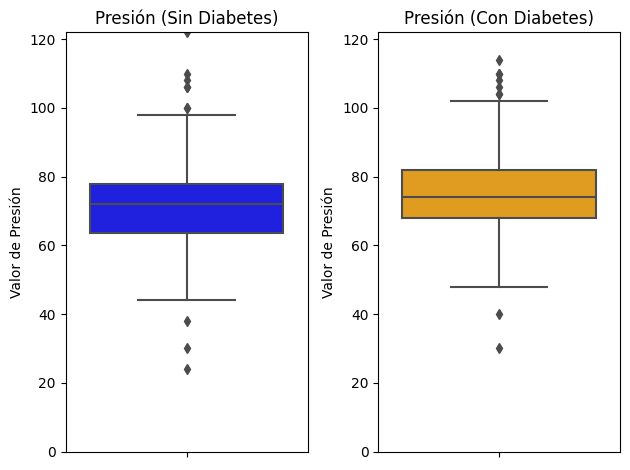

Presión (Sin diabetes):
count    500.000000
mean      70.920000
std       11.929385
min       24.000000
25%       63.500000
50%       72.000000
75%       78.000000
max      122.000000
Name: pres, dtype: float64
Presión (Con diabetes):
count    268.000000
mean      75.123134
std       11.951672
min       30.000000
25%       68.000000
50%       74.000000
75%       82.000000
max      114.000000
Name: pres, dtype: float64


In [17]:
# Boxplot para 'pres' en el dataframe df0 (sin diabetes)
plt.subplot(1, 2, 1)
sns.boxplot(y=df0["pres"], color="blue")
plt.title('Presión (Sin Diabetes)')
plt.ylabel('Valor de Presión')
plt.ylim(0, df["pres"].max())  # Igualar escala en el eje y

# Boxplot para 'pres' en el dataframe df1 (con diabetes)
plt.subplot(1, 2, 2)
sns.boxplot(y=df1["pres"], color="orange")
plt.title('Presión (Con Diabetes)')
plt.ylabel('Valor de Presión')
plt.ylim(0, df["pres"].max())  # Igualar escala en el eje y

# Ajustar el espaciado entre las gráficas
plt.tight_layout()
plt.show()

print(f"Presión (Sin diabetes):\n{df0["pres"].describe()}")
print(f"Presión (Con diabetes):\n{df1["pres"].describe()}")

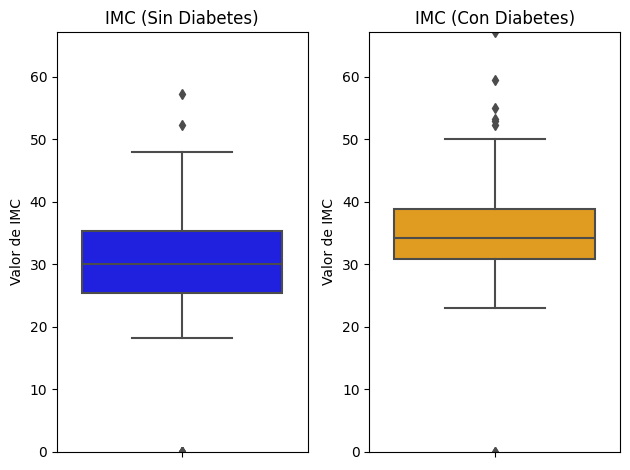

IMC (Sin diabetes):
count    500.000000
mean      30.304200
std        7.689855
min        0.000000
25%       25.400000
50%       30.050000
75%       35.300000
max       57.300000
Name: mass, dtype: float64
IMC (Con diabetes):
count    268.000000
mean      35.142537
std        7.262967
min        0.000000
25%       30.800000
50%       34.250000
75%       38.775000
max       67.100000
Name: mass, dtype: float64


In [18]:
# Boxplot para 'mass' en el dataframe df0 (sin diabetes)
plt.subplot(1, 2, 1)
sns.boxplot(y=df0["mass"], color="blue")
plt.title('IMC (Sin Diabetes)')
plt.ylabel('Valor de IMC')
plt.ylim(0, df["mass"].max())  # Igualar escala en el eje y

# Boxplot para 'mass' en el dataframe df1 (con diabetes)
plt.subplot(1, 2, 2)
sns.boxplot(y=df1["mass"], color="orange")
plt.title('IMC (Con Diabetes)')
plt.ylabel('Valor de IMC')
plt.ylim(0, df["mass"].max())  # Igualar escala en el eje y

# Ajustar el espaciado entre las gráficas
plt.tight_layout()
plt.show()

print(f"IMC (Sin diabetes):\n{df0["mass"].describe()}")
print(f"IMC (Con diabetes):\n{df1["mass"].describe()}")

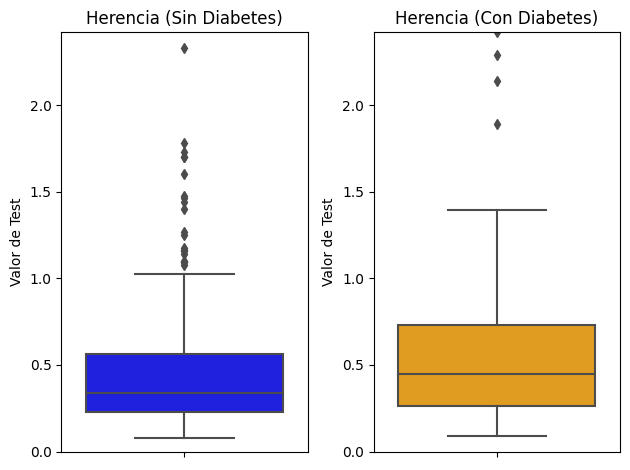

Herencia (Sin diabetes):
count    500.000000
mean       0.429734
std        0.299085
min        0.078000
25%        0.229750
50%        0.336000
75%        0.561750
max        2.329000
Name: pedi, dtype: float64
Herencia (Con diabetes):
count    268.000000
mean       0.550500
std        0.372354
min        0.088000
25%        0.262500
50%        0.449000
75%        0.728000
max        2.420000
Name: pedi, dtype: float64


In [19]:
# Boxplot para 'pedi' en el dataframe df0 (sin diabetes)
plt.subplot(1, 2, 1)
sns.boxplot(y=df0["pedi"], color="blue")
plt.title('Herencia (Sin Diabetes)')
plt.ylabel('Valor de Test')
plt.ylim(0, df["pedi"].max())  # Igualar escala en el eje y

# Boxplot para 'pedi' en el dataframe df1 (con diabetes)
plt.subplot(1, 2, 2)
sns.boxplot(y=df1["pedi"], color="orange")
plt.title('Herencia (Con Diabetes)')
plt.ylabel('Valor de Test')
plt.ylim(0, df["pedi"].max())  # Igualar escala en el eje y

# Ajustar el espaciado entre las gráficas
plt.tight_layout()
plt.show()

print(f"Herencia (Sin diabetes):\n{df0["pedi"].describe()}")
print(f"Herencia (Con diabetes):\n{df1["pedi"].describe()}")

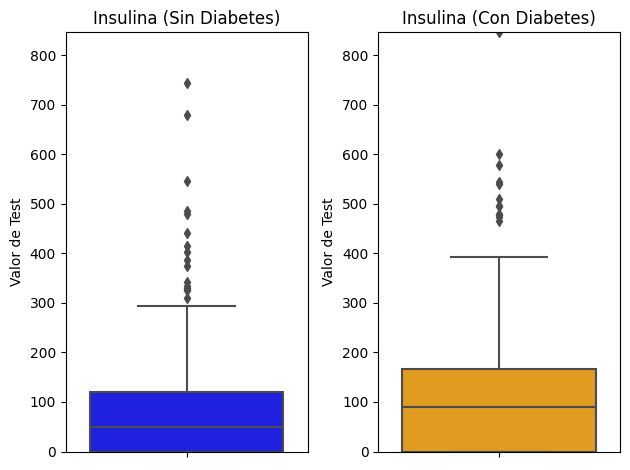

Insulina (Sin diabetes):
count    500.000000
mean      73.542000
std       98.447163
min        0.000000
25%        0.000000
50%       49.500000
75%      119.250000
max      744.000000
Name: insu, dtype: float64
Insulina (Con diabetes):
count    268.000000
mean     107.798507
std      136.425600
min        0.000000
25%        0.000000
50%       90.000000
75%      167.250000
max      846.000000
Name: insu, dtype: float64


In [20]:
# Boxplot para 'insu' en el dataframe df0 (sin diabetes)
plt.subplot(1, 2, 1)
sns.boxplot(y=df0["insu"], color="blue")
plt.title('Insulina (Sin Diabetes)')
plt.ylabel('Valor de Test')
plt.ylim(0, df["insu"].max())  # Igualar escala en el eje y

# Boxplot para 'insu' en el dataframe df1 (con diabetes)
plt.subplot(1, 2, 2)
sns.boxplot(y=df1["insu"], color="orange")
plt.title('Insulina (Con Diabetes)')
plt.ylabel('Valor de Test')
plt.ylim(0, df["insu"].max())  # Igualar escala en el eje y

# Ajustar el espaciado entre las gráficas
plt.tight_layout()
plt.show()

print(f"Insulina (Sin diabetes):\n{df0["insu"].describe()}")
print(f"Insulina (Con diabetes):\n{df1["insu"].describe()}")

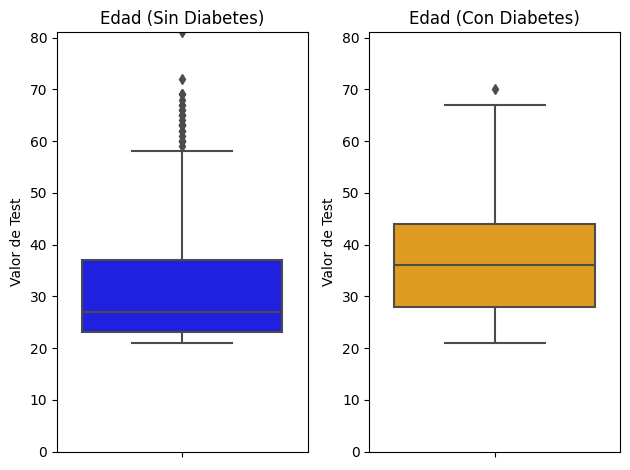

Edad (Sin diabetes):
count    500.000000
mean      31.190000
std       11.667655
min       21.000000
25%       23.000000
50%       27.000000
75%       37.000000
max       81.000000
Name: age, dtype: float64
Edad (Con diabetes):
count    268.000000
mean      37.067164
std       10.968254
min       21.000000
25%       28.000000
50%       36.000000
75%       44.000000
max       70.000000
Name: age, dtype: float64


In [21]:
# Boxplot para 'age' en el dataframe df0 (sin diabetes)
plt.subplot(1, 2, 1)
sns.boxplot(y=df0["age"], color="blue")
plt.title('Edad (Sin Diabetes)')
plt.ylabel('Valor de Test')
plt.ylim(0, df["age"].max())  # Igualar escala en el eje y

# Boxplot para 'age' en el dataframe df1 (con diabetes)
plt.subplot(1, 2, 2)
sns.boxplot(y=df1["age"], color="orange")
plt.title('Edad (Con Diabetes)')
plt.ylabel('Valor de Test')
plt.ylim(0, df["age"].max())  # Igualar escala en el eje y

# Ajustar el espaciado entre las gráficas
plt.tight_layout()
plt.show()

print(f"Edad (Sin diabetes):\n{df0["age"].describe()}")
print(f"Edad (Con diabetes):\n{df1["age"].describe()}")

Análisis: 

Aplicando diagramas de caja a cada una de las columnas analizadas anteriormente, sí podemos ver una diferenciación clara entre los valores estadísticos descriptivos en la base donde el resultado es negativo o positivo, principalmente podemos observar diferencias con las variables de embarazo, glucosa, IMC y edad, donde generalmente la distribución de los datos varía para las personas diagnosticadas, siendo que a mayor valor obtenido para estas variables, más probable es la existencia de diabetes, este pequeño análisis también se puede aplicar pero en menor medida para la herencia, donde la variación parece ser un poco menor. Finalmente, también podemos observar varios valores atípicos que le diagrama de caja logró distinguir. Se necesitaría un preprocesamiento más riguroso tomando en cuenta estos registros que se escapan de los límites establecidos por la distancia del rango intercuartilico.

In [22]:
# Tabla de correlación general
corrMatrix = abs(df.corr())

# Generar la tabla de correlación de nuestra variable objetivo
classMatrix = abs(df.corr()['class'])
classMatrix = classMatrix[classMatrix.abs() > 0.2].sort_values(ascending=False).to_frame()
classMatrix

,class
class,1.000000
gluc,0.492782
mass,0.292695
age,0.238356
preg,0.221898


<Axes: >

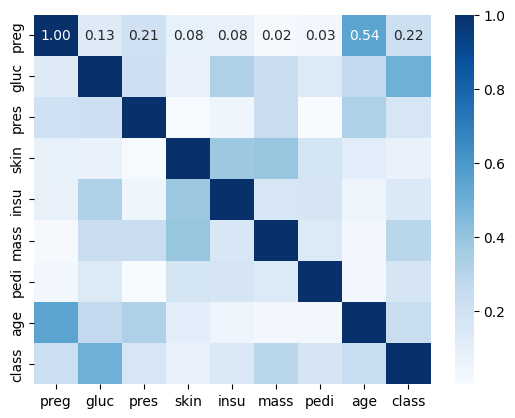

In [23]:
# Mapa de calor general
Heat_Map = sns.heatmap(corrMatrix, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map

<Axes: >

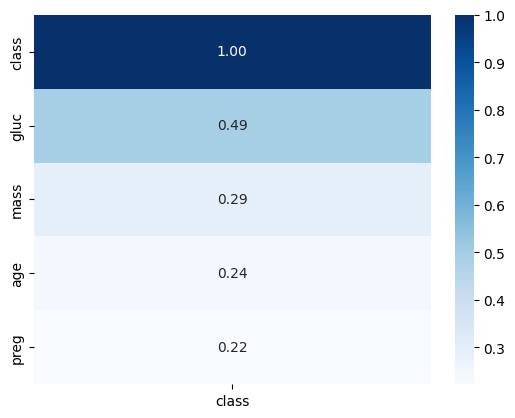

In [24]:
# Gráficamos el mapa de calor enfocado en la clase objetivo (Filtro en correlaciones arriba de 0.2)
classMap = sns.heatmap(classMatrix, cmap = 'Blues', annot = True, fmt = ".2f")
classMap

Análisis:

Con estas tablas de correlación y mapa de calor, se puede observar que las variables que tienen un mayor impacto en nuestra variable objetivo, la columna clase, fue el test de glucosa, el Índice de Masa Corporal, la edad y el tiempo que las pacientes han estado embarazadas. Con este análisis exploratorio y descriptivo, podemos empezar a planetar los modelos que nos ayudarán a predecir si un paciente tiene diabetes o no, así como las métricas de desempeño resultantes de este proceso.

# Análisis Inicial (Modelos)

Los modelos que se aplicarán en este problema serán

- Regresión Logística con Matriz de confusión
- Árboles de decisión
- Random Forest
- K-Nearest Neighbors
- Redes Neuronales
- Sistema de Voto

## Regresión Logística

Matriz de confusión:
[[ 45  36]
 [ 16 134]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       150
           1       0.74      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.74       231
weighted avg       0.77      0.77      0.77       231



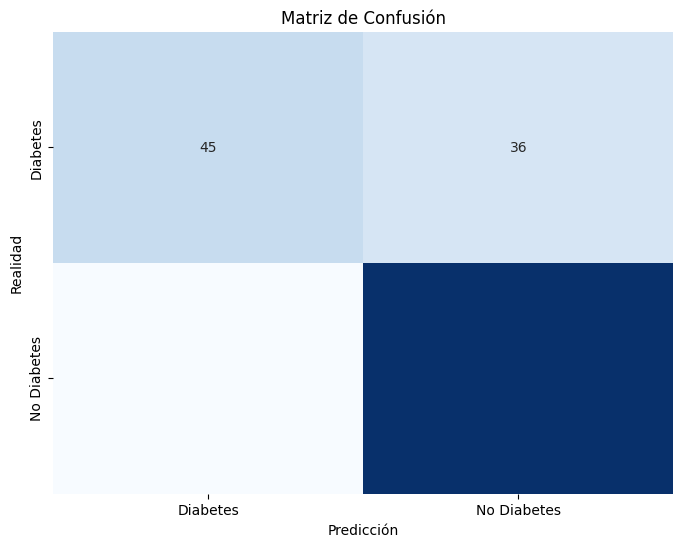

In [25]:
## Regresión Logística
# Declaramos las variables dependientes e independientes

Vars_Indep = df.drop(columns=["class"])
Var_Dep = df['class']

# Redefinimos las variables
X = Vars_Indep
y = Var_Dep

# Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3, stratify= y)

# Se escalan todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables "x" tanto de entrenamiento como de prueba, utilizaremos fit_transform

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

# Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression(max_iter=1000)

# Entrenamos el modelo
algoritmo = algoritmo.fit(X_train, y_train)

# Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, y_pred, labels=[1, 0])  # 1 es diabetes, 0 es no diabetes
print("Matriz de confusión:")
print(matriz)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["Diabetes", "No Diabetes"], 
            yticklabels=["Diabetes", "No Diabetes"])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

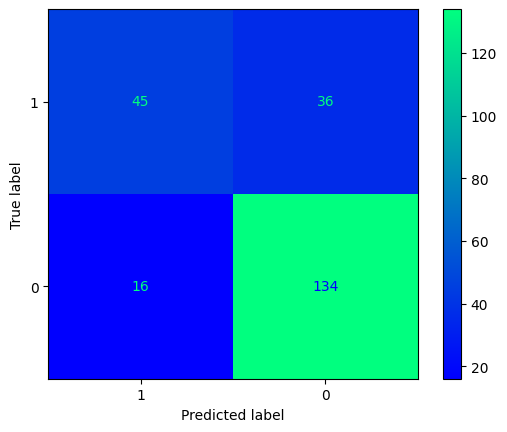

In [26]:
# Matriz creada sin necesidad de modelo previo
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels = [1,0], cmap = 'winter')
plt.show()

Análisis: El primer modelo usado fue el de regresión logística junto al reporte de clasificación para obtener las métricas, así como la matriz de confusión para mostrar los resultados gráficamente viendo los VP, VN, FP, FN. Para este modelo, se decidió dividir el conjunto de entrenamiento y prueba con una distribución del 70% y 30%, gracias a esto se obtuvieron 231 registros donde se obtuvieron los siguientes resultados:

- Exactitud de 77%
- Precisión (Aquellos que tienen diabetes): 74% 
- Recall (Aquellos que tienen diabetes): 0.56
- Métrica F1 Score (Aquellos que tienen diabetes): 0.63

El modelo, aunque tiene una precisión aceptable, su capacidad para identificar correctamente a los pacientes dabéticos no es tan buena ya que el recall no posee un porcentaje alto y poco menos de la mitad de los casos de diabetes se están perdiendo por lo que es indispensable seguir haciendo pruebas o probando con otros clasificadores.


## Árboles de decisión

Matriz de confusión:
[[ 50  31]
 [ 42 108]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       150
           1       0.54      0.62      0.58        81

    accuracy                           0.68       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.70      0.68      0.69       231



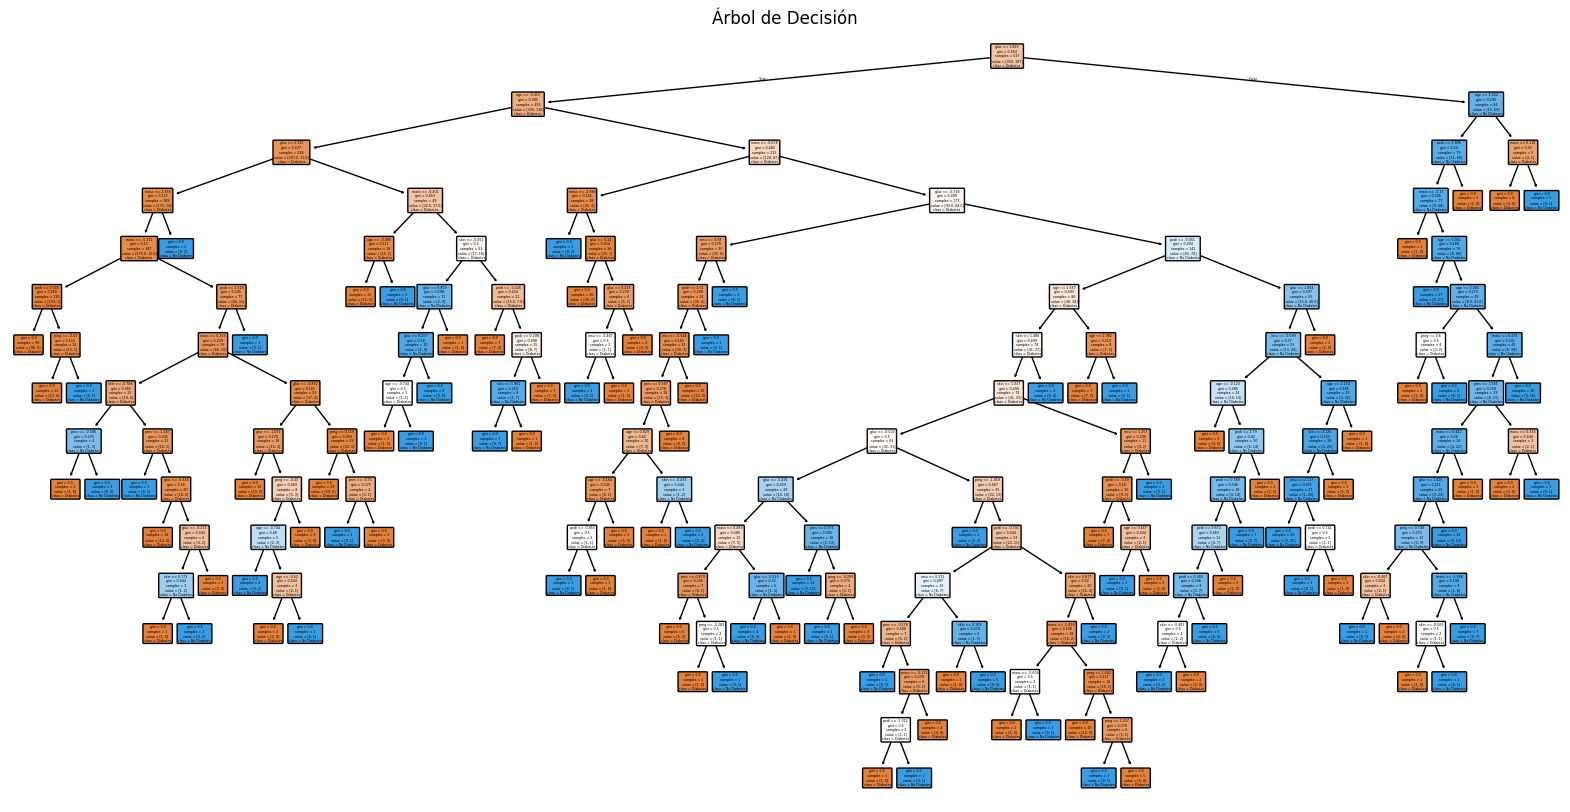

In [27]:
clasificadorArbol = DecisionTreeClassifier(random_state=3)

################## Modelo ###########################
modeloArbol = clasificadorArbol.fit(X_train, y_train)
predictArbol=modeloArbol.predict(X_test)

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, predictArbol, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictArbol))

# Visualización del árbol
plt.figure(figsize=(20, 10))  # Ajustamos el tamaño de la figura
plot_tree(clasificadorArbol, filled=True, feature_names=Vars_Indep.columns, class_names=["Diabetes", "No Diabetes"], rounded=True)
plt.title("Árbol de Decisión")
plt.show()

## Random Forest

Matriz de confusión:
[[ 50  31]
 [ 42 108]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       150
           1       0.73      0.63      0.68        81

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231



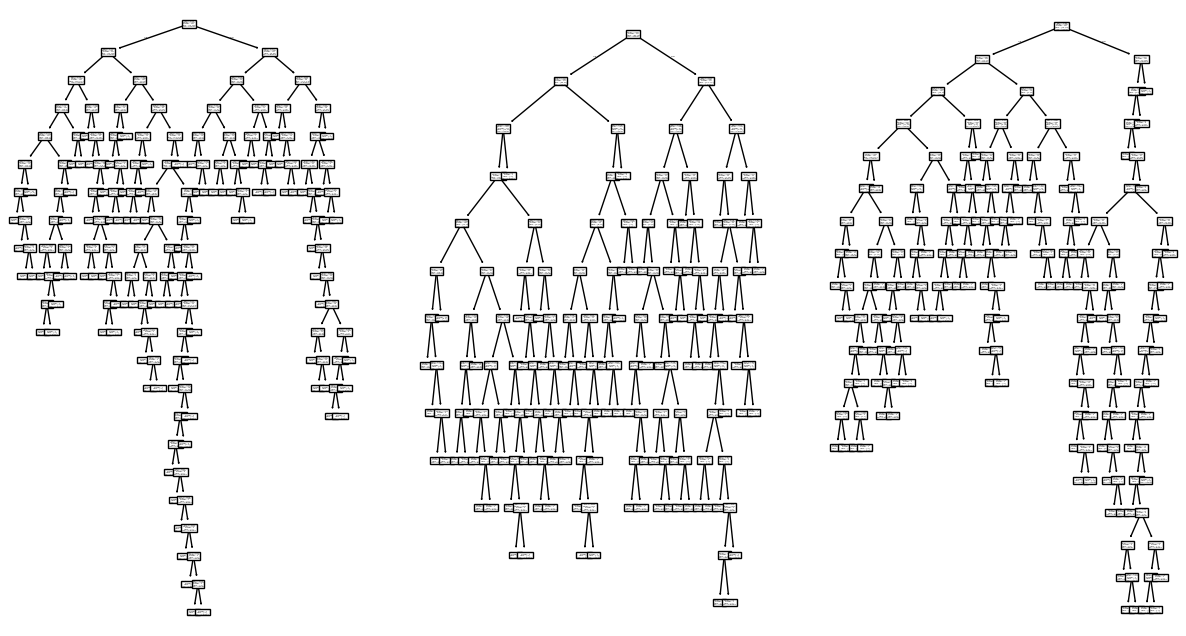

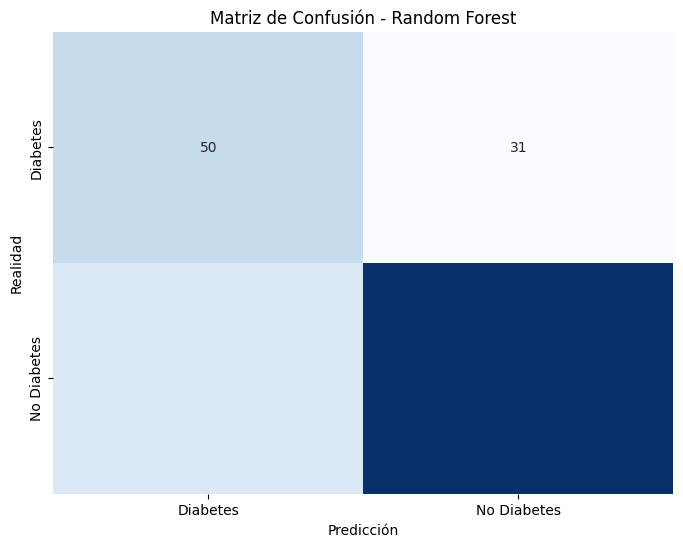

In [28]:
# Clasificador #
clasificadorRandom = RandomForestClassifier(n_estimators = 80, criterion = 'entropy')
# Parámetros: n_estimators (Número de arboles en mi bosque), max_depth, criterion,

# Modelo #
modeloRandom = clasificadorRandom.fit(X_train, y_train)

# Generar una figura #
fig = plt.figure(figsize = (15,8))

# Subplots #
ax1 = fig.add_subplot(1,3,1) # Fila, columnas, posición
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

tree.plot_tree(modeloRandom.estimators_[0], feature_names = Vars_Indep.columns, class_names = ["Diabetes", "No Diabetes"], ax = ax1)
tree.plot_tree(modeloRandom.estimators_[1], feature_names = Vars_Indep.columns, class_names = ["Diabetes", "No Diabetes"], ax = ax2)
tree.plot_tree(modeloRandom.estimators_[2], feature_names = Vars_Indep.columns, class_names = ["Diabetes", "No Diabetes"], ax = ax3)

### Clasificación y evaluación
predictForest = modeloRandom.predict(X_test)

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, predictArbol, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictForest))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["Diabetes", "No Diabetes"], 
            yticklabels=["Diabetes", "No Diabetes"])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

## K-nn

Matriz de confusión:
[[ 47  34]
 [ 27 123]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       150
           1       0.64      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



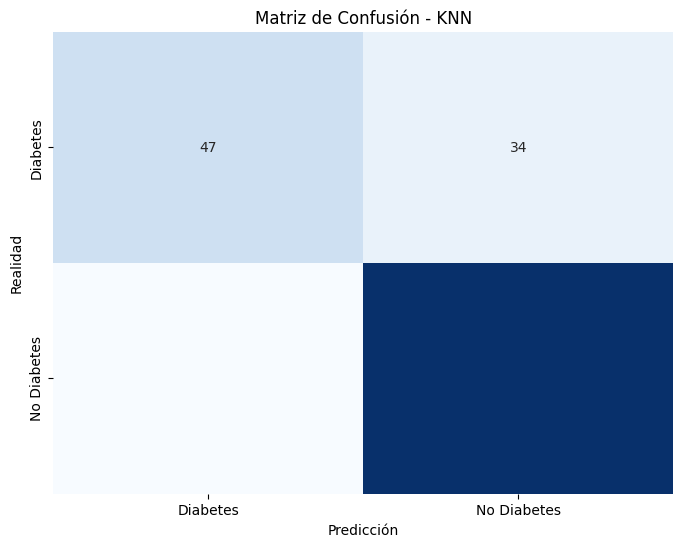

In [29]:
#1. Datos del modelo
clasificadorKnn = KNeighborsClassifier(n_neighbors=5) #Por defecto distancia euclideana y k=5

################## Modelo ###########################
modeloKnn = clasificadorKnn.fit(X_train, y_train)
predictKnn=modeloKnn.predict(X_test)

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, predictKnn, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictKnn))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["Diabetes", "No Diabetes"], 
            yticklabels=["Diabetes", "No Diabetes"])
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

## Redes Neuronales

Matriz de confusión:
[[ 52  29]
 [ 37 113]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       150
           1       0.58      0.64      0.61        81

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.72      0.71      0.72       231



c:\Users\Angel González\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


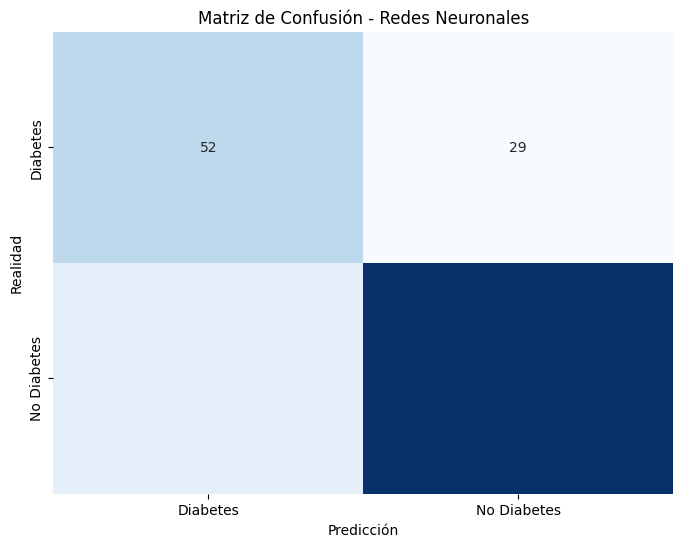

In [30]:
# Clasificador de Redes Neuronales #
clasificadorRedes = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=3)
#(hidden_layer_sizes=(100,), activation="logistic", max_iter=1000, learning_rate_init=0.001)

# Modelo
modeloRedes = clasificadorRedes.fit(X_train, y_train)
predictRedes = modeloRedes.predict(X_test)

# Matriz de confusión
matriz = confusion_matrix(y_test, predictRedes, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictRedes))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["Diabetes", "No Diabetes"], 
            yticklabels=["Diabetes", "No Diabetes"])
plt.title('Matriz de Confusión - Redes Neuronales')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

## Sistema de voto

c:\Users\Angel González\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Matriz de confusión:
[[ 51  30]
 [ 25 125]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       150
           1       0.67      0.63      0.65        81

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



c:\Users\Angel González\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


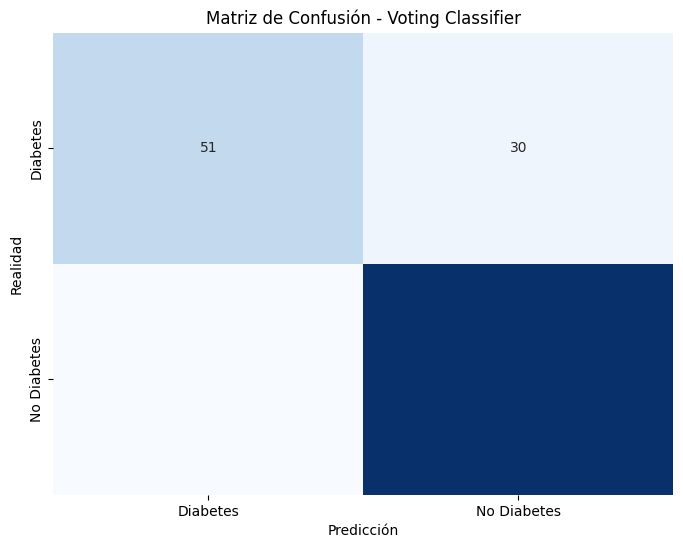

In [31]:
# Clasificadores #
Logistic = LogisticRegression(max_iter=1000)
Vecinos = KNeighborsClassifier(n_neighbors=5)
Arbol = DecisionTreeClassifier(max_depth = 7)
Random = RandomForestClassifier(n_estimators = 80, criterion = 'entropy')
Redes = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', max_iter=500, learning_rate_init=0.01)

### Ensamble ###
clasificadorVoto = VotingClassifier(estimators = [('Logistic', Logistic), ('Vecinos', Vecinos), ("Arbol", Arbol), ('Bosque', Random), ('Redes', Redes)], voting = 'soft')

# Entrenamos el modelo de votación
clasificadorVoto.fit(X_train, y_train)
modeloVoto = clasificadorVoto.fit(X_train, y_train)
predictVoto = modeloVoto.predict(X_test)

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, predictVoto, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictVoto))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["Diabetes", "No Diabetes"], 
            yticklabels=["Diabetes", "No Diabetes"])
plt.title('Matriz de Confusión - Voting Classifier')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

## Curvas ROC | Métrica AUC

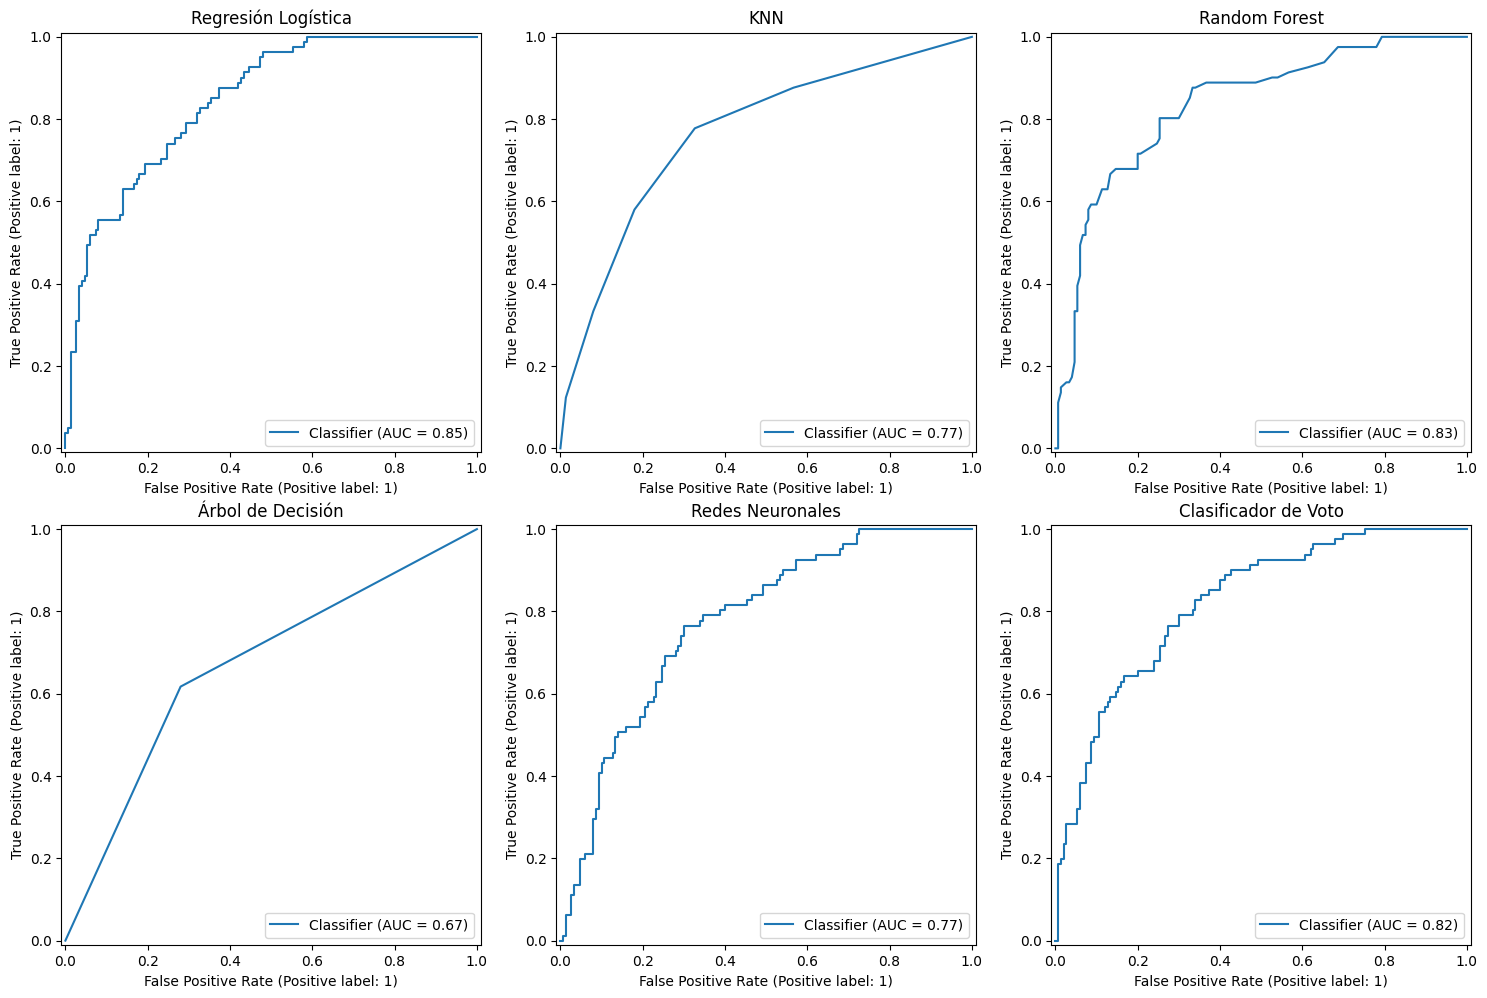

AUC Scores:
Regresión Logística: 0.845761316872428
KNN: 0.7664197530864197
Random Forest: 0.8348148148148147
Árbol de Decisión: 0.668641975308642
Redes Neuronales: 0.7744855967078189
Clasificador de Voto: 0.8213991769547325


In [32]:
# Obtener las probabilidades de predicción
predictionLogistic = algoritmo.predict_proba(X_test)  # Probabilidades de regresión logística
predictionProbKnn = modeloKnn.predict_proba(X_test)  # Probabilidades de modelo KNN
predictionProbRandom = modeloRandom.predict_proba(X_test)  # Probabilidades de modelo Random Forest
predictionProbArbol = modeloArbol.predict_proba(X_test)  # Probabilidades de modelo Árbol
predictionProbRedes = modeloRedes.predict_proba(X_test)  # Probabilidades de modelo de redes
predictionProbVoto = modeloVoto.predict_proba(X_test)  # Probabilidades de modelo de voto

# Crear figura
fig = plt.figure(figsize=[15, 10])

# Crear subgráficos
ax1 = fig.add_subplot(2, 3, 1)
ax1.set_title('Regresión Logística')
ax2 = fig.add_subplot(2, 3, 2)
ax2.set_title('KNN')
ax3 = fig.add_subplot(2, 3, 3)
ax3.set_title('Random Forest')
ax4 = fig.add_subplot(2, 3, 4)
ax4.set_title('Árbol de Decisión')
ax5 = fig.add_subplot(2, 3, 5)
ax5.set_title('Redes Neuronales')
ax6 = fig.add_subplot(2, 3, 6)
ax6.set_title('Clasificador de Voto')

# Graficar las curvas ROC
RocCurveDisplay.from_predictions(y_test, predictionLogistic[:, 1], pos_label=1, ax=ax1)
RocCurveDisplay.from_predictions(y_test, predictionProbKnn[:, 1], pos_label=1, ax=ax2)
RocCurveDisplay.from_predictions(y_test, predictionProbRandom[:, 1], pos_label=1, ax=ax3)
RocCurveDisplay.from_predictions(y_test, predictionProbArbol[:, 1], pos_label=1, ax=ax4)
RocCurveDisplay.from_predictions(y_test, predictionProbRedes[:, 1], pos_label=1, ax=ax5)
RocCurveDisplay.from_predictions(y_test, predictionProbVoto[:, 1], pos_label=1, ax=ax6)

plt.tight_layout()
plt.show()

# Calcular y mostrar AUC para cada modelo
print("AUC Scores:")
print("Regresión Logística:", roc_auc_score(y_test, predictionLogistic[:, 1]))
print("KNN:", roc_auc_score(y_test, predictionProbKnn[:, 1]))
print("Random Forest:", roc_auc_score(y_test, predictionProbRandom[:, 1]))
print("Árbol de Decisión:", roc_auc_score(y_test, predictionProbArbol[:, 1]))
print("Redes Neuronales:", roc_auc_score(y_test, predictionProbRedes[:, 1]))
print("Clasificador de Voto:", roc_auc_score(y_test, predictionProbVoto[:, 1]))


Análisis: Tras haber analizado un total de 6 clasificadores diferentes, podemos observar que aquellos datos catalogados como "0" o "tested_negative" los cuales son los pacientes que no tienen diabetes, están inflando mucho las métricas dado que el objetivo es detectar y predecir aquellas que tienen diabetes, el hecho de que se tenga una base de datos muy desbalanceada hace que muchos clasificadores capturen un buen rendimiento en general, teniendo muchas métricas como extactitud, f1_score, precisión, métricas ponderadas o macro por encima del 80% pudiendo dar a entender de que se trata de un buen clasificador, sin embargo, dado que se está aplicando el enfoque en aquellas pacientes que resultan diagnosticadas de diabetes, nos podemos dar cuenta de que esas métricas dan lugar a modelos más limitados al momento de detectar estos pacientes ya que para muchos modelos, las métricas mencionadas anteriormente rondan en un 55% y 60%.

Esta problemática puede deberse al factor del preprocesamiento en cuanto al tratado de valores atípicos los cuales no fueron procesados rigurosamente debido a que no pertenecen a la actividad integradora pero definitivamente debería incluirse al hacer un análisis mucho más profundo, otro punto a tomar en cuenta es que la clase está desbalanceada ya que hay muy pocos registros de personas con diabetes a comparación de las que no lo tienen y esto puede afectar de manera significativa en los modelos planteados.

En este sentido, el mejor modelo de predicción que resulto de hacer pruebas genéricas fue el Random Forest, ya que fue el más balanceado en términos de las métricas de precisión y recall respecto a los pacientes con diabetes logrando una precisión del 76% y un recall del 64% logrando un f1 score del 70% siendo el más robusto para este cotexto. Este clasificador será el que siga su experimentación para la siguiente fase.

# Anáisis con cambios de parámetros

Modelo que cumple con los criterios encontrado: n_estimators=50, max_depth=None, criterion=entropy
Modelo que cumple con los criterios encontrado: n_estimators=50, max_depth=14, criterion=entropy
Modelo que cumple con los criterios encontrado: n_estimators=50, max_depth=22, criterion=entropy
Modelo que cumple con los criterios encontrado: n_estimators=65, max_depth=18, criterion=gini
Modelo que cumple con los criterios encontrado: n_estimators=65, max_depth=23, criterion=gini
Modelo que cumple con los criterios encontrado: n_estimators=65, max_depth=25, criterion=gini
Modelo que cumple con los criterios encontrado: n_estimators=72, max_depth=12, criterion=gini
Modelo que cumple con los criterios encontrado: n_estimators=72, max_depth=14, criterion=gini
Modelo que cumple con los criterios encontrado: n_estimators=76, max_depth=None, criterion=entropy
Modelo que cumple con los criterios encontrado: n_estimators=76, max_depth=15, criterion=entropy
Modelo que cumple con los criterios encon

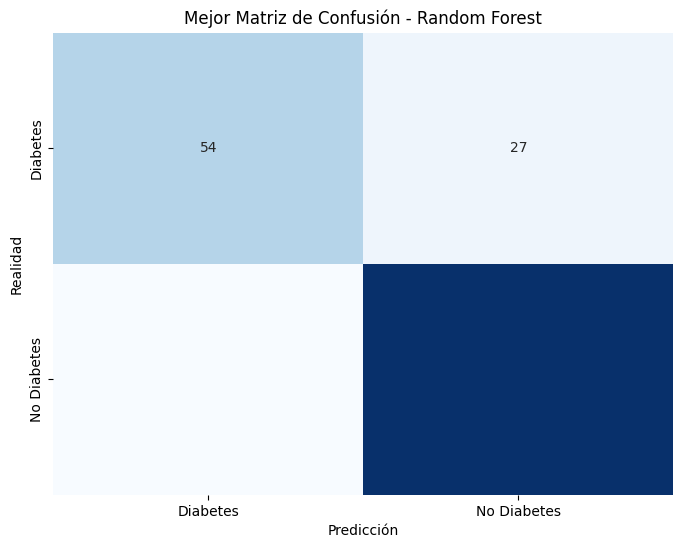

Parámetros del mejor modelo:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 23, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [38]:
# Parámetros a probar
n_estimators_list = [50, 65, 72, 74, 76, 78, 80, 83, 87, 95, 100, 120, 150, 200]
max_depth_list = [None, 10, 12, 14, 15, 18, 20, 21, 22, 23, 25, 27]
criterion_list = ['gini', 'entropy']

# Guardamos la variable que contendrá el mejor modelo así como los resultados
best_model = None
results = []

# Inicio de ciclo para recorrer los elementos de las listas que se definieron como parámetros
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for criterion in criterion_list:
            # Crear y entrenar el modelo
            clasificadorRandom = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion)
            modeloRandom = clasificadorRandom.fit(X_train, y_train)
            
            # El modelo predice nuestra variable objetivo
            predictForest = modeloRandom.predict(X_test)
            
            # Se obtiene el reporte de clasificación y 
            report = classification_report(y_test, predictForest, output_dict=True)
            recall_1 = report['1']['recall']
            precision_1 = report['1']['precision']
            
            # Se guardan los resultados en mi lista antes vacía
            results.append({'n_estimators': n_estimators,'max_depth': max_depth,'criterion': criterion,'precision_1': precision_1,'recall_1': recall_1})
            
            # Le coloqué un if ya que tras algunas pruebas realizadas, sin aplicar este parámetro el modelo cumplía con los requisitos similares a este
            if precision_1 >= 0.60 and recall_1 >= 0.65:
                best_model = modeloRandom
                print(f"Modelo que cumple con los criterios encontrado: n_estimators={n_estimators}, max_depth={max_depth}, criterion={criterion}")
                break # Sale del if para continuar con el código
            
# Crear DataFrame con los resultados
results_df = pd.DataFrame(results)

# Si se encuentra un modelo que cumple con los criterios, se muestran las métricas del modelo seleccionado
if best_model:
    predictRandomForest = best_model.predict(X_test)
    matriz = confusion_matrix(y_test, predictRandomForest, labels=[1, 0])
    print("Mejor Matriz de Confusión:")
    print(matriz)
    print("\nMejor Reporte de Clasificación:")
    print(classification_report(y_test, predictRandomForest))

    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=["Diabetes", "No Diabetes"], 
                yticklabels=["Diabetes", "No Diabetes"])
    plt.title('Mejor Matriz de Confusión - Random Forest')
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()
    # Mostrar los parámetros del mejor modelo
    print("Parámetros del mejor modelo:")
    print(best_model.get_params()) # Encontrar los elementos del mejor modelo Random Forest
else:
    print("No se encontró ningún modelo que cumpliera con los criterios especificados.")


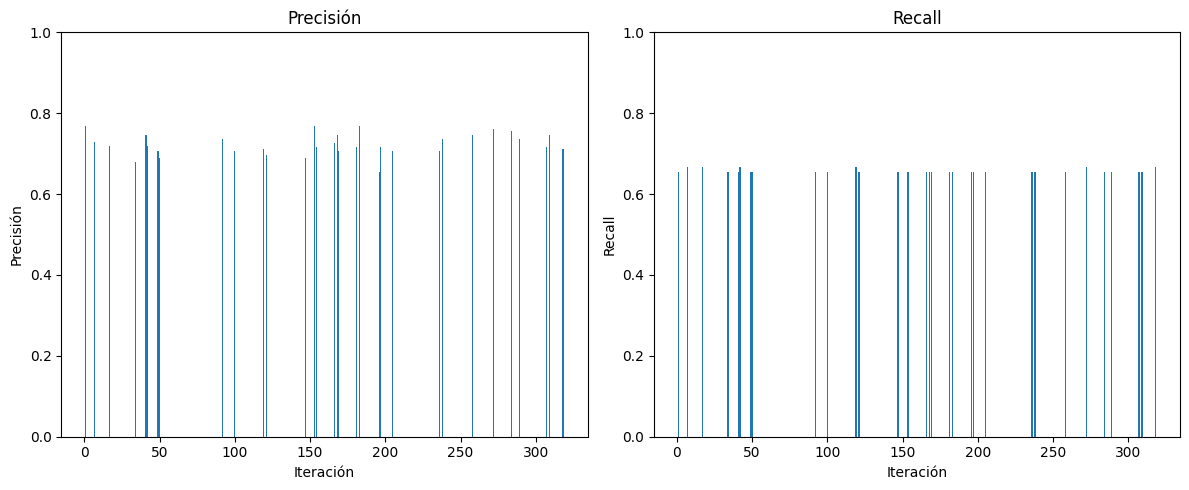

In [39]:
import matplotlib.pyplot as plt

# Filtrar los mejores resultados (precisión >= 0.69 y recall >= 0.68)
best_results_df = results_df[(results_df['precision_1'] >= 0.65) & (results_df['recall_1'] >= 0.65)]

# Graficar precisión y recall con barplots para los mejores resultados usando matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Barplot de Precisión
ax1.bar(best_results_df.index, best_results_df['precision_1'])
ax1.set_title('Precisión')
ax1.set_xlabel('Iteración')
ax1.set_ylabel('Precisión')
ax1.set_ylim(0,1)

# Barplot de Recall
ax2.bar(best_results_df.index, best_results_df['recall_1'])
ax2.set_title('Recall')
ax2.set_xlabel('Iteración')
ax2.set_ylabel('Recall')
ax2.set_ylim(0,1)

plt.tight_layout()
plt.show()


In [40]:
# Imprimir las matrices de confusión para los conjuntos de entrenamiento y evaluación
predictTrain = best_model.predict(X_train)
matriz_train = confusion_matrix(y_train, predictTrain, labels=[1, 0])
matriz_test = confusion_matrix(y_test, predictRandomForest, labels=[1, 0])
print(matriz_train)
print(matriz_test)

[[187   0]
 [  0 350]]
[[ 54  27]
 [ 22 128]]


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Total registros en conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Total registros en conjunto de prueba: {X_test.shape[0]}")
print(f"Registros en X_train: {X_train.shape[0]}")
print(f"Registros en y_train: {y_train.shape[0]}")
print(f"Registros en X_test: {X_test.shape[0]}")
print(f"Registros en y_test: {y_test.shape[0]}")


Total registros en conjunto de entrenamiento: 537
Total registros en conjunto de prueba: 231
Registros en X_train: 537
Registros en y_train: 537
Registros en X_test: 231
Registros en y_test: 231


In [44]:
# Parámetros a probar
n_estimators_list = [50, 65, 76, 78, 80, 83, 87, 95, 100, 120, 150, 200]
max_depth_list = [None, 10, 12, 14, 15, 18, 20, 21, 22, 23, 25, 30, 40]
criterion_list = ['gini', 'entropy']

# Guardamos la variable que contendrá el mejor modelo
best_model = None
train_results = []

# Inicio de ciclo para recorrer los elementos de las listas que se definieron como parámetros
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for criterion in criterion_list:
            # Crear y entrenar el modelo
            clasificadorRandom = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion)
            modeloRandom = clasificadorRandom.fit(X_train, y_train)
            
            # Predicción en el conjunto de entrenamiento
            predictTrain = modeloRandom.predict(X_train)
            train_report = classification_report(y_train, predictTrain, output_dict=True)
            train_recall_1 = train_report['1']['recall']
            train_precision_1 = train_report['1']['precision']
            
            # Guardar los resultados del entrenamiento
            train_results.append({'n_estimators': n_estimators, 'max_depth': max_depth, 'criterion': criterion, 'precisionTrain': train_precision_1, 'recallTrain': train_recall_1})
            
# Crear DataFrame con los resultados de entrenamiento
train_results_df = pd.DataFrame(train_results)
train_results_df.head(5)



,n_estimators,max_depth,criterion,precision_1,recall_1
0,50,NaN,gini,1.0,1.000000
1,50,NaN,entropy,1.0,0.994652
2,50,10.0,gini,1.0,0.973262
3,50,10.0,entropy,1.0,1.000000
4,50,12.0,gini,1.0,1.000000
...,...,...,...,...,...
307,200,25.0,entropy,1.0,1.000000
308,200,30.0,gini,1.0,1.000000
309,200,30.0,entropy,1.0,1.000000
310,200,40.0,gini,1.0,1.000000


In [46]:
# Data frame del modelo
results_df.head(5)

,n_estimators,max_depth,criterion,precision_1,recall_1
0,50,NaN,gini,0.681159,0.580247
1,50,NaN,entropy,0.768116,0.654321
2,50,10.0,gini,0.700000,0.604938
3,50,10.0,entropy,0.694444,0.617284
4,50,12.0,gini,0.671429,0.580247
...,...,...,...,...,...
318,200,23.0,gini,0.710526,0.666667
319,200,25.0,gini,0.718310,0.629630
320,200,25.0,entropy,0.724638,0.617284
321,200,27.0,gini,0.690141,0.604938


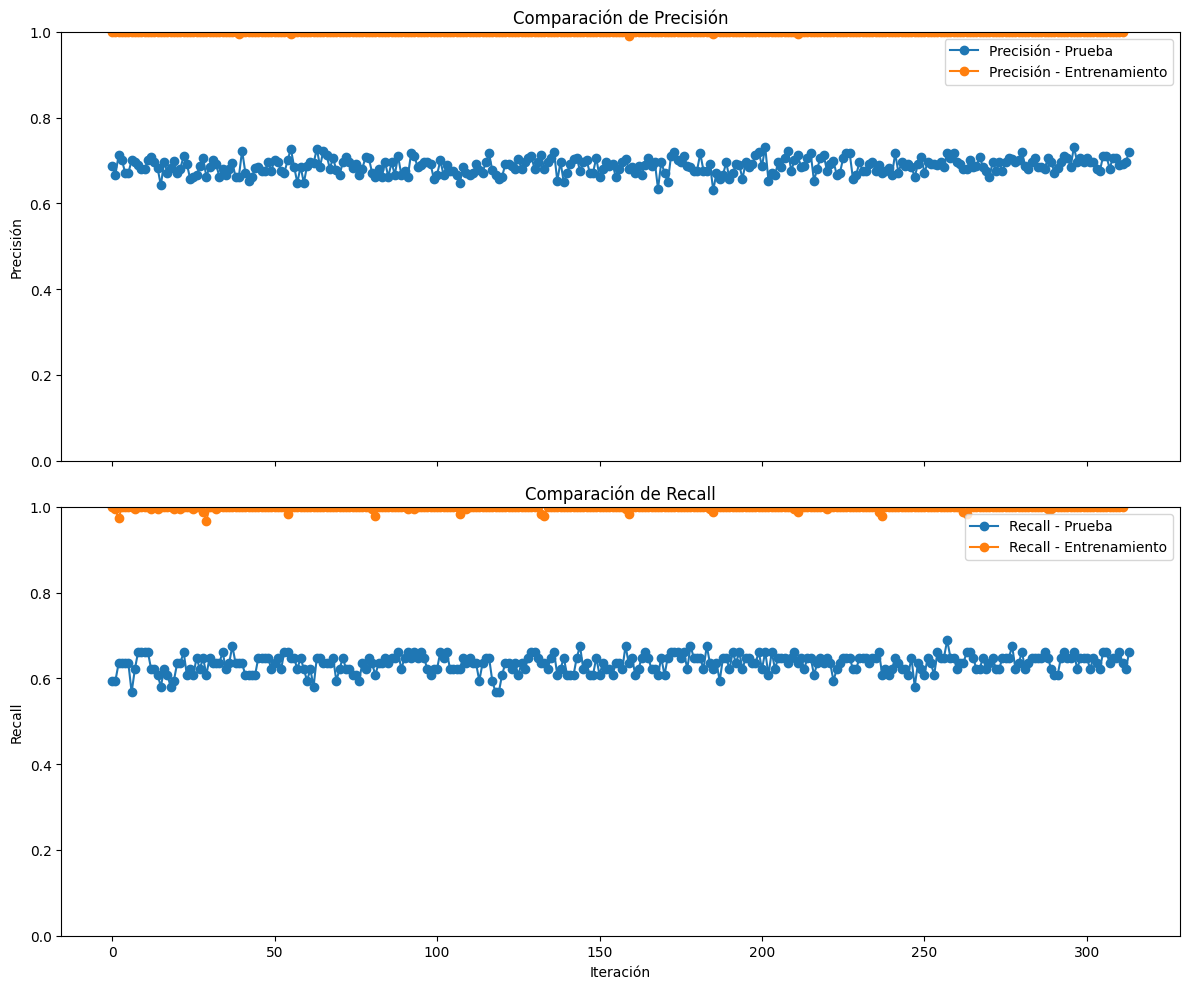

In [52]:
# Crear la figura y los ejes
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Gráfica de precisión
ax[0].plot(results_df.index, results_df['precision_1'], label='Precisión - Prueba', marker='o')
ax[0].plot(train_results_df.index, train_results_df['precision_1'], label='Precisión - Entrenamiento', marker='o')
ax[0].set_title('Comparación de Precisión')
ax[0].set_ylabel('Precisión')
ax[0].set_ylim(0, 1)
ax[0].legend()

# Gráfica de recall
ax[1].plot(results_df.index, results_df['recall_1'], label='Recall - Prueba', marker='o')
ax[1].plot(train_results_df.index, train_results_df['recall_1'], label='Recall - Entrenamiento', marker='o')
ax[1].set_title('Comparación de Recall')
ax[1].set_xlabel('Iteración')
ax[1].set_ylabel('Recall')
ax[1].set_ylim(0, 1)
ax[1].legend()

plt.tight_layout()
plt.show()


Análisis: 

Después de generar diversos experimentos probando con el recall y la precisión de aquellas pacientes con diabetes, determiné un mínimo en mi modelo que debe cumplirse con los if dentro de mi ciclo anidado, esto ya que quiero almacenar el mejor modelo partiendo de una base donde la precisión y el recall deben ser mayores al 68% ya que ambas métricas de evaluación me interesan con un peso similar, y, aunque el modelo siga siendo limitado en cuanto a sus predicciones, al rededor de un 68% y 70% de f1 score para mi objetivo, el modelo se encuentra equilibrado para tener calidad y cantidad en equilibrio.

Respecto a las matrices de confusión, el modelo de predicción que yo elegí tienen una cantidad moderada de falsos positivos que merman el análisis en el que estoy interesado, sin embargo, el modelo actúa bien para determinar a los pacientes que no tienen diabetes, mientras que el modelo con el conjunto de entrenamiento sí puede hacer las predicciones correctamente para ambos casos. Finalmente guardé los resultados en dos dataframes que me ayudaron a gráficar los resultados obtenidos donde claramente se observa un comportamiento homogeneo para las métricas usando el conjunto de entrenamiento, mientras que para el caso de prueba, estas métricas varían entre el 60% y el 70% de resultados para el recall y precisión.

# Conclusiones

En esta actividad integradora se tuvo ayuda de intepretación de nuestras variables al tener el archivo txt con el significado de las columnas, esto resultando de gran ayuda para poder conocer la base de datos y tener un mejor entendimiento del análisis descriptivo realizado al inicio de la actividad, dando una mejor interpretación y observando casos o comportamientos atípicos con el registro de los datos teniendo valores como 0 en glucosa o presión los cuales tuvieron que ser reemplazados con la mediana para no afectar la distribución de los datos. También fue interesante hacer los diagramas de caja entre los dataframes filtrados entre los pacientes que contaban con la enfermedad y los que no, además, pudimos reafirmar la hipotesis del peso de las variables con la tabla de correlación y el mapa de calor los cuales fueron muy úitles para la identificación de aquellas variables que condicionaban más la clase final.

En cuanto a los modelos, la mayoría tuvieron resultados satisfactorios para aquellas mujeres que no poseían diabetes, sin ebargo, se tuvieron problemas al momento de determinar aquellas que tenían la enfermedad con porcentajes en el recall y precisión bastante medias con un 50% y 60%, y, dado el tipo de análisis el cual está dentro del ámbito médico se podrían considerar modelos malos ya que el modelo no puede clasificar bien a la mitad de los pacientes. Esto puede deberse debido a que no se realizó una cáptura de datos ni preprocesamiento exhaustivo, además, la base de datos ya contaba con un desbalanceo en la clase objetivo muy grande, mismo que ya fue comentado en el análisis estadístico descriptivo. 

Para el uso de las métricas, sí encuentro una diferenciación muy grande tomando en cuenta a las matrices de confusión, las curvas ROC, métricas numéricas como el reporte así como el AUC, esto porque algunas se enfocan en ambos elemento de la clasificación y otros dependiendo del análisis que se desee, por ejemplo las curvas ROC nos dan un panórama general sobre que tan robusto es el modelo de clasificación tomando en cuenta ambos elementos (tested_positive y tested_negative) sin embaego en el detalle, considero que las métricas más importantes están dentro del reporte en el cual se pueden desglosar métricas más significativas en este contexto como lo es la precisión, recall y f1 tanto en peso ponderado como individualmente.

Finalmente, con la experimentación se pudo mejorar un poquito el modelo al hacer diversas pruebas, y, aunque las métricas resultaron mejores ajustando ciertos parámetros del clasificador elegido (Random Forest), realmente el crecimiento no fue muy alto (Solo de unos pocos decimales más), a pesar de los cambios aplicados a base de ciclos, el modelo demuestra un rango entre el 60% y 70% en valor de sus métricas lo cual nos da un modelo no tan bueno general, y a consideración personal, yo no lo usaría para ser filtro en una clínica o sondeo. En caso de querer usar este modelo predictivo, primero reorganizaría la base, aplicaría otros estudios cualitativos o cuantitativos, como el ejercicio, el balanceo de comidas, u otros recursos médicos con ayuda de un experto en esa área, también haría un proceso exhaustivo en el preprocesamiento el cual no fue mencionado para la actividad y que no realicé, finalmente, intentaría hacer un muestreo balanceado para personas con diabetes y sin diabetes con el fin de hacer un modelo más robusto, con más variables, datos preprocesados y así podría mejorar las métricas de los modelos obtenidos en esta actividad integradora.